In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
noise_multipliers = ['0.2', '0.4', '0.5','0.6', '0.7', '0.8','0.9','1.0', '1.1']
IP_params = ['2','4','6','8','10']

In [3]:
#Differential Privacy results
DP_train_acc=[]
DP_test_acc=[]
DP_train_loss = []
fed_train_acc=[]
for noise in noise_multipliers:
    file = open("./DP_fedavg/DP fedprox_test_accuracy_after_50_rounds_noise_multiplier_{0}.p".format(str(noise)), "rb")
    test_accuracy = pickle.load(file)
    file.close()
    DP_test_acc.append(test_accuracy)
    file = open("./DP_fedavg/DP fedprox_train_accuracy_after_50_rounds_noise_multiplier_{0}.p".format(str(noise)), "rb")
    train_accuracy = pickle.load(file)
    DP_train_acc.append(train_accuracy)
    file.close()
    file = open("./DP_fedavg/DP fedprox_history_after_50_rounds_noise_multiplier_{0}.p".format(str(noise)), "rb")
    train_loss = pickle.load(file)
    DP_train_loss.append(train_loss)
    file.close()

In [4]:
print(test_accuracy)
print(train_accuracy)

[0.12203323096036911, 0.21687103807926178, 0.22903481125831604, 0.40733781456947327, 0.5160205960273743, 0.5846518874168396, 0.6710838675498962, 0.6964003443717957, 0.7285403609275818, 0.7246835231781006, 0.7458465099334717, 0.7575158476829529, 0.7725474834442139, 0.7743275165557861, 0.7966772317886353, 0.7947982549667358, 0.8062697649002075, 0.8110166192054749, 0.8164557218551636, 0.8236748576164246, 0.8103243708610535, 0.8095332384109497, 0.8210047483444214, 0.8345530033111572, 0.835344135761261, 0.8362341523170471, 0.8418710231781006, 0.8440466523170471, 0.8432555198669434, 0.8464201092720032, 0.84375, 0.8511669039726257, 0.8554192781448364, 0.857594907283783, 0.8559137582778931, 0.8614517450332642, 0.8626384735107422, 0.859375, 0.8644185066223145, 0.8659018874168396, 0.8641218543052673, 0.8682753443717957, 0.8704509735107422, 0.8670886158943176, 0.8715387582778931, 0.8674841523170471, 0.8655063509941101, 0.8696597814559937, 0.8714398741722107, 0.8743077516555786]
[0.121746182441711

In [5]:
#Integral Privacy results
IP_train_acc=[]
IP_test_acc = []
IP_train_loss = []
for k in IP_params:
    file = open("./IP_fedavg/IP_fedavg_iid/FedProx train accuracy after 50 rounds with k = {0}.p".format(str(k)), "rb")
    train_accuracy = pickle.load(file)
    IP_train_acc.append(train_accuracy)
    file.close()
    file = open("./IP_fedavg/IP_fedavg_iid/FedProx test accuracy after 50 rounds with k = {0}.p".format(str(k)), "rb")
    test_accuracy = pickle.load(file)
    IP_test_acc.append(test_accuracy)
    file.close()
    file = open("./IP_fedavg/IP_fedavg_iid/FedProx history after 50 rounds with k = {0}.p".format(str(k)), "rb")
    train_loss = pickle.load(file)
    IP_train_loss.append(train_loss)
    file.close()

In [6]:
#fedAvg Results
fedAvg_train_acc = []
fedAvg_test_acc = []
fedAvg_train_loss = []
#no loop here
file = open("./Fedavg models/fedprox_train_accuracy_after_50_rounds.p", "rb")
train_accuracy = pickle.load(file)
fedAvg_train_acc.append(train_accuracy)
file.close()
file = open("./Fedavg models/fedprox_test_accuracy_after_50_rounds.p", "rb")
test_accuracy = pickle.load(file)
fedAvg_test_acc.append(test_accuracy)
file.close()
file = open("./Fedavg models/fedprox_history_after_50_rounds.p", "rb")
train_loss = pickle.load(file)
fedAvg_train_loss.append(train_loss)
file.close()

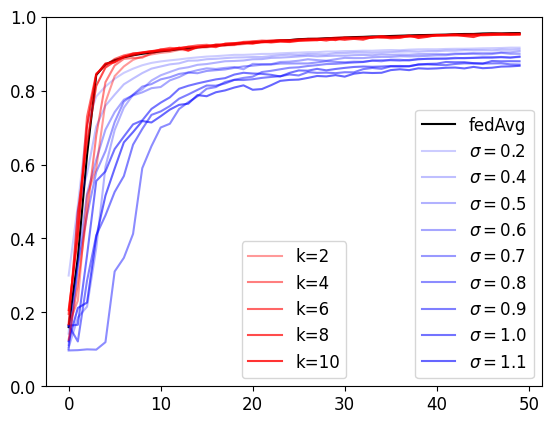

In [7]:
## Plotting train accuracy results
DP_colors = plt.get_cmap('Blues', len(noise_multipliers))
IP_colors = plt.get_cmap('Reds', len(IP_params))
plt.plot(fedAvg_train_acc[0], color='k', label="fedAvg")
alphas_DP = np.linspace(0.2, 0.6, len(noise_multipliers))
alphas_IP = np.linspace(0.4, 0.8, len(IP_params))

plt.ylim([0.0, 1.0])
for i in range(len(noise_multipliers)):
    plt.plot(DP_train_acc[i], color='b', alpha=alphas_DP[i], label='$\sigma=$' + str(noise_multipliers[i]))
for i in range(len(IP_params)):
    plt.plot(IP_train_acc[i], color='r', alpha=alphas_IP[i], label="k=" + str(IP_params[i]))

lines = plt.gca().get_lines()
legend1 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1)],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1)],
                     loc=4, fontsize=12)
legend2 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1, len(lines))],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1, len(lines))],
                     loc=8, fontsize=12)
plt.gca().add_artist(legend1)

# Increase the size of the x-axis and y-axis labels
#plt.xlabel('Epochs', fontsize=14)
#plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("MNIST_fedprox_iid_train_accuracy.pdf", bbox_inches='tight')
plt.show()

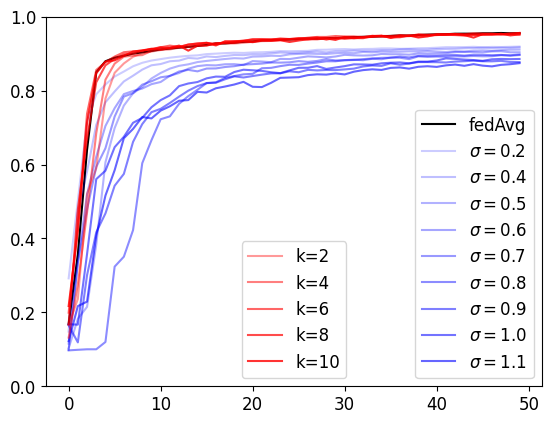

In [8]:
## plotting test accuracy results
DP_colors = plt.get_cmap('Blues', len(noise_multipliers))
IP_colors = plt.get_cmap('Reds', len(IP_params))
plt.plot(fedAvg_test_acc[0], color='k', label = "fedAvg")
alphas_DP = np.linspace(0.2, 0.6, len(noise_multipliers))
alphas_IP = np.linspace(0.4, 0.8, len(IP_params))

plt.ylim([0.0, 1.0])
for i in range(len(noise_multipliers)):
    plt.plot(DP_test_acc[i], color = 'b', alpha = alphas_DP[i], label = '$\sigma=$'+str(noise_multipliers[i]))
for i in range(len(IP_params)):
    plt.plot(IP_test_acc[i], color = 'r', alpha = alphas_IP[i], label = "k="+str(IP_params[i]))
    
lines = plt.gca().get_lines()
legend1 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1)],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1)],
                     loc=4, fontsize=12)
legend2 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1, len(lines))],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1, len(lines))],
                     loc=8, fontsize=12)
plt.gca().add_artist(legend1)

# Increase the size of the x-axis and y-axis labels
#plt.xlabel('Epochs', fontsize=14)
#plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("MNIST_fedprox_iid_test_accuracy.pdf", bbox_inches='tight')
plt.show()

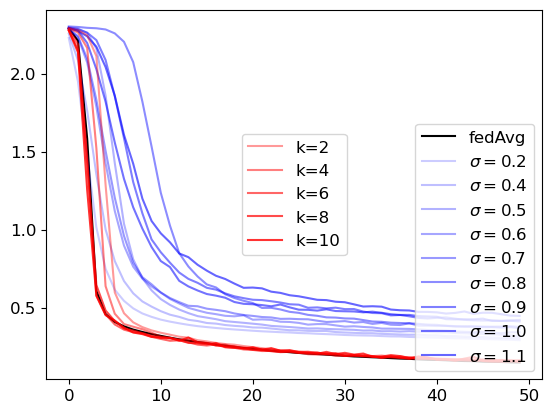

In [18]:
#plotting train loss results
DP_colors = plt.get_cmap('Blues', len(noise_multipliers))
IP_colors = plt.get_cmap('Reds', len(IP_params))
plt.plot(fedAvg_train_loss[0], color='k', label = "fedAvg")
alphas_DP = np.linspace(0.2, 0.6, len(noise_multipliers))
alphas_IP = np.linspace(0.4, 0.8, len(IP_params))

#plt.ylim([0.0, 1.0])
for i in range(len(noise_multipliers)):
    plt.plot(DP_train_loss[i], color = 'b', alpha = alphas_DP[i], label = '$\sigma=$'+str(noise_multipliers[i]))
for i in range(len(IP_params)):
    plt.plot(IP_train_loss[i], color = 'r', alpha = alphas_IP[i], label = "k="+str(IP_params[i]))
    
lines = plt.gca().get_lines()
legend1 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1)],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1)],
                     loc=4, fontsize=12)
legend2 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1, len(lines))],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1, len(lines))],
                     loc=10, fontsize=12)
plt.gca().add_artist(legend1)

# Increase the size of the x-axis and y-axis labels
#plt.xlabel('Epochs', fontsize=14)
#plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("MNIST_fedprox_iid_train_loss.pdf", bbox_inches='tight')
plt.show()

In [19]:
#Differential Privacy results --noniid
DP_train_acc=[]
DP_test_acc=[]
DP_train_loss = []
fed_train_acc=[]
for noise in noise_multipliers:
    file = open("./DP_fedavg/DP fedprox_noniid_test_accuracy_after_50_rounds_noise_multiplier_{0}.p".format(str(noise)), "rb")
    test_accuracy = pickle.load(file)
    DP_test_acc.append(test_accuracy)
    file = open("./DP_fedavg/DP fedprox_noniid_train_accuracy_after_50_rounds_noise_multiplier_{0}.p".format(str(noise)), "rb")
    train_accuracy = pickle.load(file)
    DP_train_acc.append(train_accuracy)
    file = open("./DP_fedavg/DP fedprox_noniid_history_after_50_rounds_noise_multiplier_{0}.p".format(str(noise)), "rb")
    train_loss = pickle.load(file)
    DP_train_loss.append(train_loss)

In [20]:
#Integral Privacy results --noniid
IP_train_acc=[]
IP_test_acc = []
IP_train_loss = []
for k in IP_params:
    file = open("./IP_fedavg/IP_fedavg_noniid/FedProx non-iid train accuracy after 50 rounds with k = {0}.p".format(str(k)), "rb")
    train_accuracy = pickle.load(file)
    IP_train_acc.append(train_accuracy)
    file = open("./IP_fedavg/IP_fedavg_noniid/FedProx non-iid test accuracy after 50 rounds with k = {0}.p".format(str(k)), "rb")
    test_accuracy = pickle.load(file)
    IP_test_acc.append(test_accuracy)
    file = open("./IP_fedavg/IP_fedavg_noniid/FedProx non-iid history after 50 rounds with k = {0}.p".format(str(k)), "rb")
    train_loss = pickle.load(file)
    IP_train_loss.append(train_loss)

In [21]:
#fedAvg Results
fedAvg_train_acc = []
fedAvg_test_acc = []
fedAvg_train_loss = []
#no loop here
file = open("./Fedavg models/fedprox_noniid_train_accuracy_after_50_rounds.p", "rb")
train_accuracy = pickle.load(file)
fedAvg_train_acc.append(train_accuracy)
file = open("./Fedavg models/fedprox_noniid_test_accurac y_after_50_rounds.p", "rb")
test_accuracy = pickle.load(file)
fedAvg_test_acc.append(test_accuracy)
file = open("./Fedavg models/fedprox_noniid_history_after_50_rounds.p", "rb")
train_loss = pickle.load(file)
fedAvg_train_loss.append(train_loss)


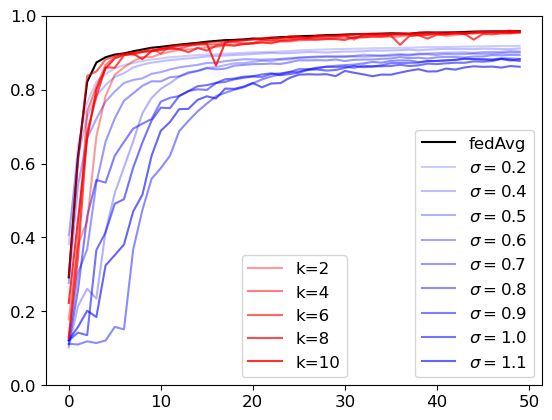

In [22]:
## Plotting train accuracy results --noniid
DP_colors = plt.get_cmap('Blues', len(noise_multipliers))
IP_colors = plt.get_cmap('Reds', len(IP_params))
plt.plot(fedAvg_train_acc[0], color='k', label="fedAvg")
alphas_DP = np.linspace(0.2, 0.6, len(noise_multipliers))
alphas_IP = np.linspace(0.4, 0.8, len(IP_params))

plt.ylim([0.0, 1.0])
for i in range(len(noise_multipliers)):
    plt.plot(DP_train_acc[i], color='b', alpha=alphas_DP[i], label='$\sigma=$' + str(noise_multipliers[i]))
for i in range(len(IP_params)):
    plt.plot(IP_train_acc[i], color='r', alpha=alphas_IP[i], label="k=" + str(IP_params[i]))

lines = plt.gca().get_lines()
legend1 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1)],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1)],
                     loc=4, fontsize=12)
legend2 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1, len(lines))],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1, len(lines))],
                     loc=8, fontsize=12)
plt.gca().add_artist(legend1)

# Increase the size of the x-axis and y-axis labels
#plt.xlabel('Epochs', fontsize=14)
#plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("MNIST_fedprox_noniid_train_accuracy.pdf", bbox_inches='tight')
plt.show()

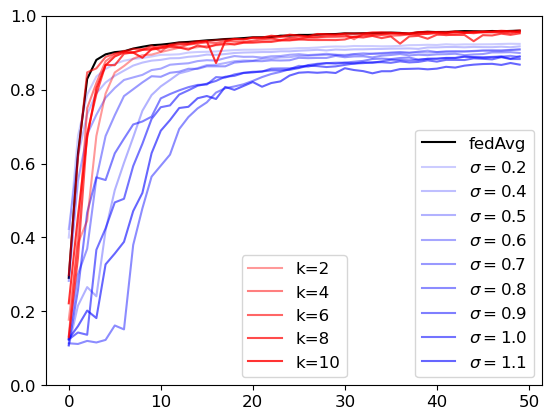

In [23]:
## plotting test accuracy results --noniid
DP_colors = plt.get_cmap('Blues', len(noise_multipliers))
IP_colors = plt.get_cmap('Reds', len(IP_params))
plt.plot(fedAvg_test_acc[0], color='k', label = "fedAvg")
alphas_DP = np.linspace(0.2, 0.6, len(noise_multipliers))
alphas_IP = np.linspace(0.4, 0.8, len(IP_params))

plt.ylim([0.0, 1.0])
for i in range(len(noise_multipliers)):
    plt.plot(DP_test_acc[i], color = 'b', alpha = alphas_DP[i], label = '$\sigma=$'+str(noise_multipliers[i]))
for i in range(len(IP_params)):
    plt.plot(IP_test_acc[i], color = 'r', alpha = alphas_IP[i], label = "k="+str(IP_params[i]))
    
lines = plt.gca().get_lines()
legend1 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1)],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1)],
                     loc=4, fontsize=12)
legend2 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1, len(lines))],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1, len(lines))],
                     loc=8, fontsize=12)
plt.gca().add_artist(legend1)

# Increase the size of the x-axis and y-axis labels
#plt.xlabel('Epochs', fontsize=14)
#plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("MNIST_fedprox_noniid_test_accuracy.pdf", bbox_inches='tight')
plt.show()

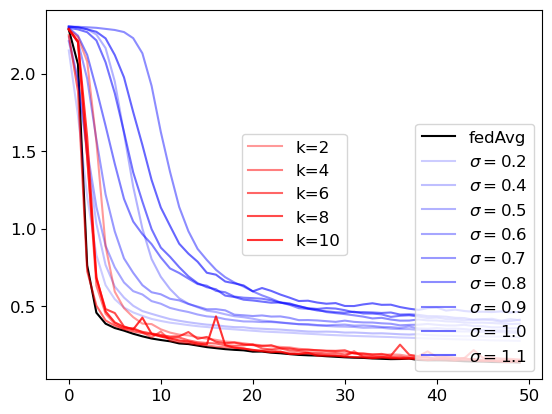

In [24]:
#plotting train loss results
DP_colors = plt.get_cmap('Blues', len(noise_multipliers))
IP_colors = plt.get_cmap('Reds', len(IP_params))
plt.plot(fedAvg_train_loss[0], color='k', label = "fedAvg")
alphas_DP = np.linspace(0.2, 0.6, len(noise_multipliers))
alphas_IP = np.linspace(0.4, 0.8, len(IP_params))

#plt.ylim([0.0, 1.0])
for i in range(len(noise_multipliers)):
    plt.plot(DP_train_loss[i], color = 'b', alpha = alphas_DP[i], label = '$\sigma=$'+str(noise_multipliers[i]))
for i in range(len(IP_params)):
    plt.plot(IP_train_loss[i], color = 'r', alpha = alphas_IP[i], label = "k="+str(IP_params[i]))
    
lines = plt.gca().get_lines()
legend1 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1)],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1)],
                     loc=4, fontsize=12)
legend2 = plt.legend([lines[i] for i in range(len(noise_multipliers)+1, len(lines))],
                     [lines[i].get_label() for i in range(len(noise_multipliers)+1, len(lines))],
                     loc=10, fontsize=12)
plt.gca().add_artist(legend1)

# Increase the size of the x-axis and y-axis labels
#plt.xlabel('Epochs', fontsize=14)
#plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("MNIST_fedprox_noniid_train_loss.pdf", bbox_inches='tight')
plt.show()